In [1]:
import numpy as np
!pip install -q git+https://github.com/huggingface/transformers.git

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 236.8/236.8 kB 4.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 55.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 48.8 MB/s eta 0:00:00


In [2]:
from warnings import filterwarnings
import tensorflow as tf
from tensorflow import io
from tensorflow import image as image_tf
from matplotlib import pyplot as plt

<dtype: 'uint8'>


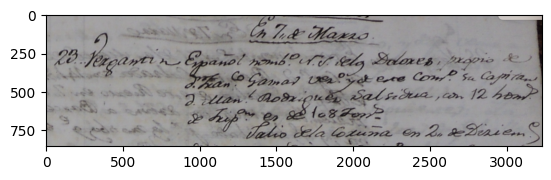

In [3]:

filterwarnings("ignore") 
tf_img = io.read_file("example_crop_1746.png")
tf_img = image_tf.decode_png(tf_img, channels=3)
print(tf_img.dtype)
plt.imshow(tf_img)
#plt.show()

In [4]:
tf_img.shape

TensorShape([854, 3230, 3])

In [5]:
import keras.utils as image_k

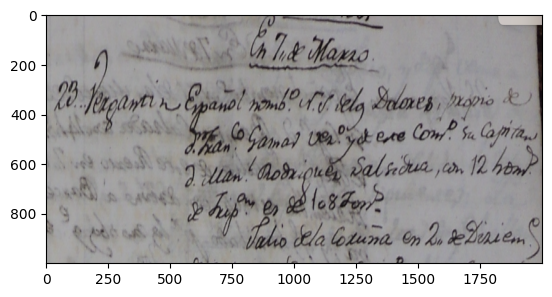

In [6]:
img = image_k.load_img("example_crop_1746.png",target_size=(1000,2000,3))
img = np.asarray(img)
plt.imshow(img)
# img = np.expand_dims(img, axis=0)
# from keras.applications.vgg16 import VGG16
# model = VGG16()
# output = model.predict(img)

In [7]:
def process_image(image):
    #image=tf.image.per_image_standardization(image)
    image=tf.image.resize(image,(224,224),method='gaussian',antialias=True)   
    return image

In [8]:
img.shape

(1000, 2000, 3)

In [9]:
img2 = process_image(img)/255

In [10]:
img2.shape

TensorShape([224, 224, 3])

In [11]:
img2 = np.expand_dims(img2, axis=0)



In [12]:
import skimage.io
# read image
original = skimage.io.imread(fname="example_crop_1746.png")

In [13]:
from skimage.color import rgb2gray

original = skimage.io.imread(fname="example_crop_1746.png")[:,:,:3]
grayscale = rgb2gray(original)

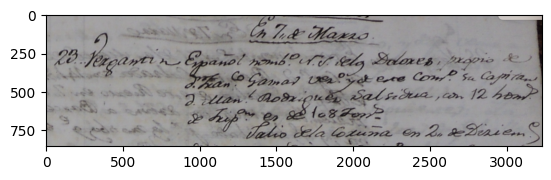

In [14]:
plt.imshow(original)

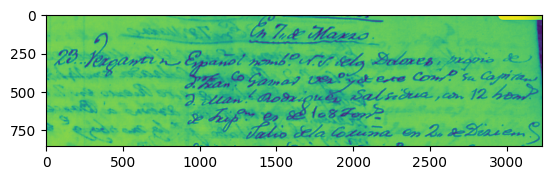

In [15]:
plt.imshow(grayscale)

In [16]:
crop = grayscale

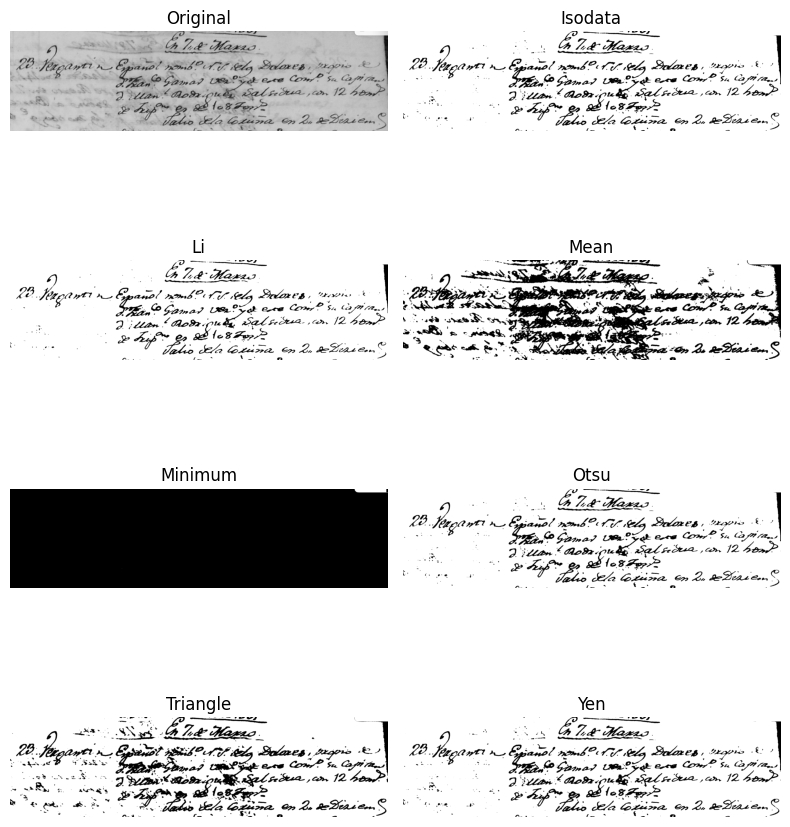

In [17]:
from skimage.filters import try_all_threshold

# img = data.page()

# Here, we specify a radius for local thresholding algorithms.
# If it is not specified, only global algorithms are called.
fig, ax = try_all_threshold(crop, figsize=(8, 10), verbose=False)
plt.show()

In [18]:
img

array([[[166, 166, 167],
        [166, 166, 166],
        [165, 165, 165],
        ...,
        [183, 173, 169],
        [183, 173, 168],
        [182, 172, 168]],

       [[166, 166, 167],
        [166, 166, 166],
        [165, 165, 165],
        ...,
        [183, 173, 169],
        [183, 173, 168],
        [182, 172, 168]],

       [[166, 165, 167],
        [166, 165, 166],
        [165, 165, 165],
        ...,
        [183, 173, 169],
        [183, 173, 168],
        [182, 172, 168]],

       ...,

       [[164, 164, 164],
        [164, 164, 164],
        [165, 165, 165],
        ...,
        [150, 150, 147],
        [149, 150, 145],
        [149, 150, 145]],

       [[164, 164, 164],
        [164, 164, 164],
        [165, 165, 165],
        ...,
        [151, 150, 147],
        [149, 150, 145],
        [148, 150, 144]],

       [[164, 164, 164],
        [164, 164, 164],
        [165, 165, 165],
        ...,
        [151, 151, 147],
        [149, 150, 145],
        [148, 149, 144]]

In [19]:
from skimage.filters import threshold_otsu,threshold_li

In [27]:
from scipy import ndimage as ndi
from skimage import color, data, filters, graph, measure, morphology

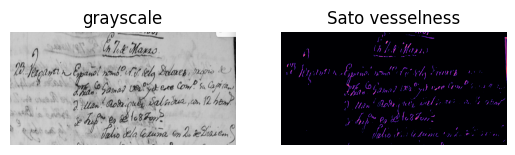

In [28]:
retina = color.rgb2gray(img)
t0,t1,t2,t3,t4 = filters.threshold_multiotsu(retina, classes=6)
mask = (retina < t0)
vessels = filters.sato(retina, sigmas=range(1, 10)) * mask

_, axes = plt.subplots(nrows=1, ncols=2)
axes[0].imshow(retina, cmap='gray')
axes[0].set_axis_off()
axes[0].set_title('grayscale')
axes[1].imshow(vessels, cmap='magma')
axes[1].set_axis_off()
_ = axes[1].set_title('Sato vesselness')

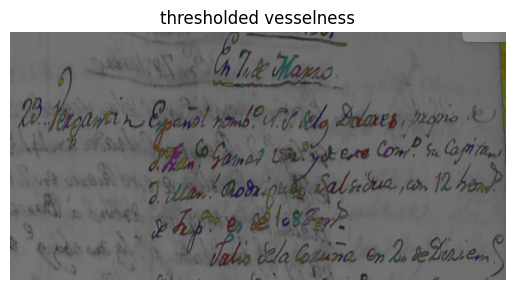

In [29]:
thresholded = filters.apply_hysteresis_threshold(vessels, 0.01, 0.03)
labeled = ndi.label(thresholded)[0]

_, ax = plt.subplots()
ax.imshow(color.label2rgb(labeled, retina))
ax.set_axis_off()
_ = ax.set_title('thresholded vesselness')

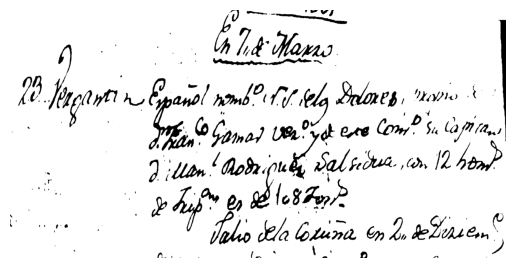

In [34]:
#retain only what is in color

mask = (retina < t0)
vessels = filters.sato(retina, sigmas=range(1, 10)) * mask
_, ax = plt.subplots()
ax.imshow(color.label2rgb(labeled, retina))
ax.set_axis_off()

thresh = threshold_li(retina)
binary = thresh > retina


ax.imshow(binary, cmap = 'gray_r')
plt.savefig('binary_page')

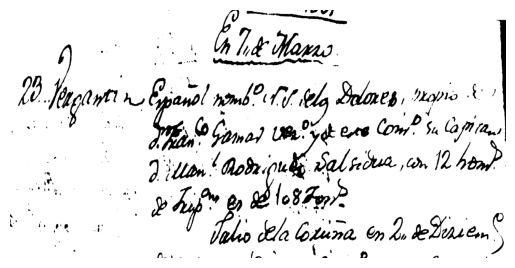

In [35]:
mask = (retina < t0)
vessels = filters.sato(retina, sigmas=range(1, 10)) * mask
_, ax = plt.subplots()
ax.imshow(color.label2rgb(labeled, retina))
ax.set_axis_off()

thresh = threshold_otsu(retina)
binary = thresh > retina


ax.imshow(binary, cmap = 'gray_r')

In [ ]:
#minimize intraclass variance
#segment the images
#vs code text editor for git
#smart clustering for text
#intersting image segmentation paper https://www.sciencedirect.com/science/article/pii/S2212017314000954 
# this looks cool as well https://www.kaggle.com/code/irinaabdullaeva/text-segmentation

In [36]:
binary_page = skimage.io.imread(fname="binary_page.png")

In [ ]:
#then explore neural network approach 


In [ ]:
#spars conv net